In [26]:
import pandas as pd
import numpy as np
# Generate sample data with 3 features and 100 samples
np.random.seed(42)
data = {
'age': np.random.randint(18, 70, 200),
'salary': np.random.uniform(30000, 100000, 200),
'educationlevel': np.random.choice(['high school', 'bachelor','master', 'phd'],200),
'experience': np.random.uniform(0,30,200),
'purchased':np.random.choice([0,1],200),
}
df = pd.DataFrame(data)
df.loc[df.sample(frac=0.15).index, 'salary']=np.nan
df.loc[df.sample(frac=0.15).index, 'experience']=np.nan

print(df.head())


   age        salary educationlevel  experience  purchased
0   56  41525.909720         master   21.174945          0
1   69  67386.259356            phd   29.059558          1
2   46           NaN       bachelor   20.640900          0
3   32           NaN            phd   25.108916          0
4   60  48858.863366         master   26.006061          0


In [28]:
print(df.isnull().sum())

age                0
salary            30
educationlevel     0
experience        30
purchased          0
dtype: int64


In [37]:
df_mean=df.copy()
df_mean['salary'].fillna(df_mean['salary'].mean(),inplace=True)
df_mean['experience'].fillna(df_mean['experience'].mean(),inplace=True)

print(df_mean.isnull().sum())

df_median=df.copy()
df_median['salary'].fillna(df_median['salary'].median(),inplace=True)
df_median['experience'].fillna(df_median['experience'].median(), inplace=True)

print(df_median.isnull().sum())

age               0
salary            0
educationlevel    0
experience        0
purchased         0
dtype: int64
age               0
salary            0
educationlevel    0
experience        0
purchased         0
dtype: int64


<ipython-input-37-1b47d0ede047>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['salary'].fillna(df_mean['salary'].mean(),inplace=True)
<ipython-input-37-1b47d0ede047>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

df_regression=pd.get_dummies(df, columns=['educationlevel'], drop_first=True)
print(df_regression.columns)

impute=SimpleImputer(strategy='mean')
df_regression['experience']=impute.fit_transform(df_regression[['experience']])

#seperate the row with and without missing values for the salary

df_complete=df_regression[df_regression['salary'].notnull()]
df_missing=df_regression[df_regression['salary'].isnull()]

#update the new feature list
features=['age','experience','educationlevel_master','educationlevel_phd']
#now train the regression model
regressor=LinearRegression()
regressor.fit(df_complete[features], df_complete['salary'])
predict_salary=regressor.predict(df_missing[features])

df_imputed_regression=df.copy()
df_imputed_regression.loc[df_imputed_regression['salary'].isnull(), 'salary']=predict_salary



Index(['age', 'salary', 'experience', 'purchased',
       'educationlevel_high school', 'educationlevel_master',
       'educationlevel_phd'],
      dtype='object')
age                0
salary             0
educationlevel     0
experience        30
purchased          0
dtype: int64


In [45]:
from sklearn.impute import KNNImputer

df_knn=df_regression[['age', 'salary', 'experience', 'educationlevel_master', 'educationlevel_phd']]

imputer= KNNImputer(n_neighbors=5)
df_knn_imputed=pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

df_imputed_knn=df.copy()
df_imputed_knn['salary']=df_knn_imputed['salary']
df_imputed_knn['experience']=df_knn_imputed['experience']

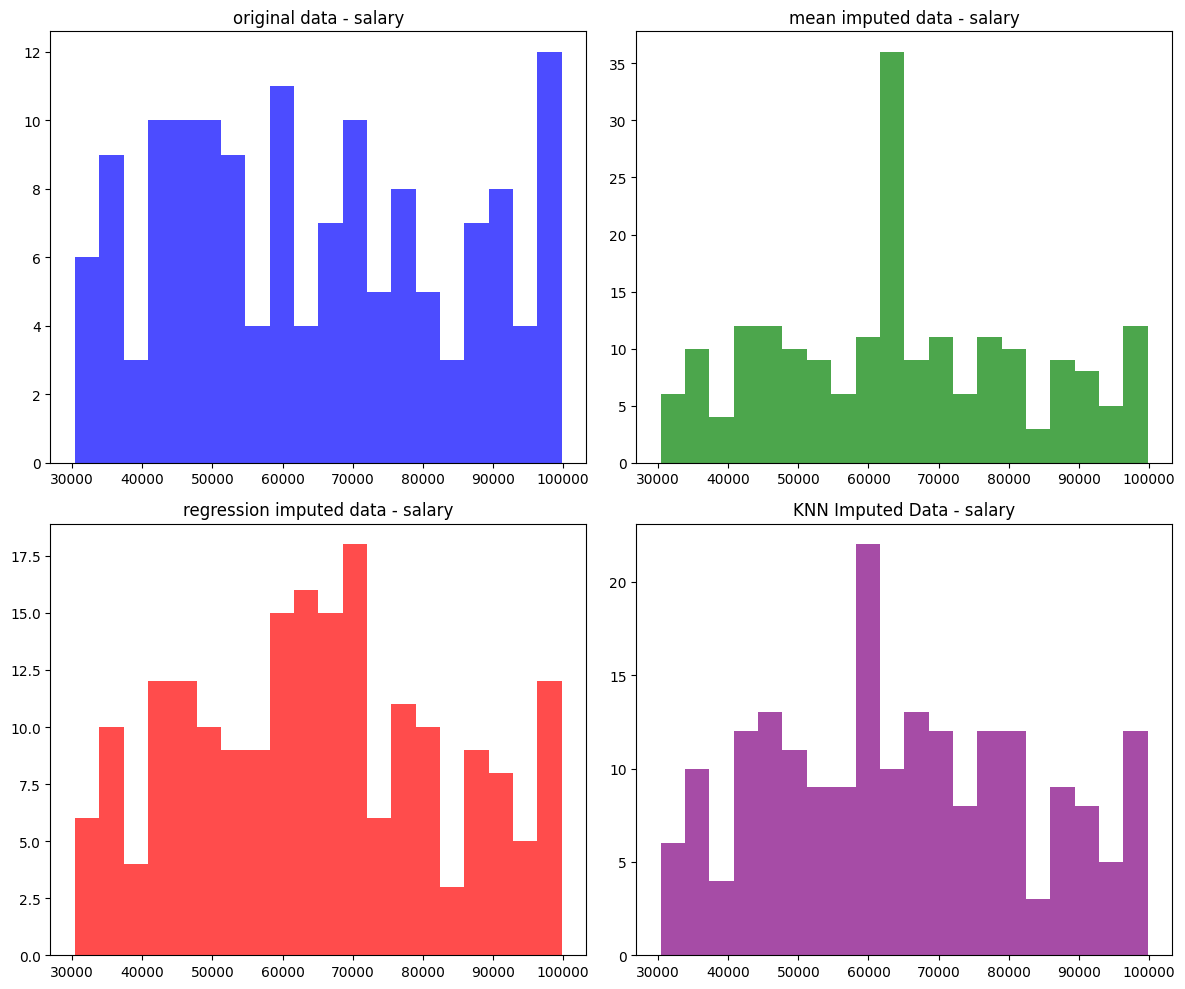

In [51]:
import matplotlib.pyplot as plt
# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# Original Data (with missing values dropped)
df_dropped = df.dropna()
axes[0, 0].hist(df_dropped['salary'], bins=20, color='blue', alpha=0.7)
axes[0, 0].set_title('original data - salary')
# Mean Imputed Data
axes[0, 1].hist(df_mean['salary'], bins=20, color='green', alpha=0.7)
axes[0, 1].set_title('mean imputed data - salary')
# Regression Imputed Data
axes[1, 0].hist(df_imputed_regression['salary'], bins=20, color='red', alpha=0.7)
axes[1, 0].set_title('regression imputed data - salary')
# KNN Imputed Data
axes[1, 1].hist(df_imputed_knn['salary'], bins=20, color='purple', alpha=0.7)
axes[1, 1].set_title('KNN Imputed Data - salary')
plt.tight_layout()
plt.show()